In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # module to split our data into train and test sets
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Import Data

In [60]:
file_name = "customer_churn.xlsx"
df = pd.read_excel(file_name,sheet_name='Telco_Churn')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [61]:
columns = set(df.columns)

for col in columns:

    print(col,': ' ,len(list(df[col].unique())),'\n')

Partner :  2 

Payment Method :  4 

Total Charges :  6531 

Tech Support :  3 

Zip Code :  1652 

Online Security :  3 

Multiple Lines :  3 

Contract :  3 

Paperless Billing :  2 

State :  1 

Longitude :  1651 

Churn Reason :  21 

Count :  1 

Dependents :  2 

Streaming Movies :  3 

Device Protection :  3 

Country :  1 

Churn Value :  2 

Churn Label :  2 

Latitude :  1652 

Senior Citizen :  2 

Lat Long :  1652 

Streaming TV :  3 

City :  1129 

CustomerID :  7043 

Tenure Months :  73 

Internet Service :  3 

Monthly Charges :  1585 

Phone Service :  2 

Online Backup :  3 

Gender :  2 



### Remove Columns

In [62]:
cols_to_remove =  ['Count','Churn Label','Lat Long','Country','State','City']

df.drop(columns = cols_to_remove, inplace = True)

Remove rows with empty values in Total Charges

In [63]:
df = df.drop(df[df['Total Charges'] == ' '].index)
df = df.drop(df[df['Monthly Charges'] == ' '].index)


df.head(1)

,CustomerID,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Reason
0,3668-QPYBK,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Competitor made better offer


In [64]:
df.dtypes

CustomerID            object
Zip Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Value            int64
Churn Reason          object
dtype: object

In [65]:
df.isnull().mean().round(4) * 100

CustomerID            0.00
Zip Code              0.00
Latitude              0.00
Longitude             0.00
Gender                0.00
Senior Citizen        0.00
Partner               0.00
Dependents            0.00
Tenure Months         0.00
Phone Service         0.00
Multiple Lines        0.00
Internet Service      0.00
Online Security       0.00
Online Backup         0.00
Device Protection     0.00
Tech Support          0.00
Streaming TV          0.00
Streaming Movies      0.00
Contract              0.00
Paperless Billing     0.00
Payment Method        0.00
Monthly Charges       0.00
Total Charges         0.00
Churn Value           0.00
Churn Reason         73.42
dtype: float64

# Data Preparation

### Train Test Split

<li>In this part we split unchurned rows into train and test. This test data will be <i>X_test</i></li>
<li>Then we combine the churned data rows with unchurned train rows to form <i>X_train</i></li>


In [66]:
# split as churned and unchurned datadrames 

churned_df = df.loc[df['Churn Value'] == 1]
unchurned = df.loc[df['Churn Value'] == 0]

print(churned_df.shape)
print(unchurned.shape)

(1869, 25)
(5163, 25)


In [67]:
unchurned_df = unchurned.sample(n = 3000)

df_sampled=pd.concat([unchurned_df,churned_df], ignore_index=True,axis=0)
df_sampled.shape

(4869, 25)

In [68]:
feature_cols = list(df_sampled.columns)
feature_cols.remove('Churn Value')


# split into features and dependent variable
X = df_sampled[feature_cols]
y = df_sampled['Churn Value']

In [69]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20,stratify=y)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (3408, 24)
y_train shape: (3408,)
X_test shape: (1461, 24)
y_test shape: (1461,)


In [70]:

X_unchurned = unchurned_df[feature_cols]
y_unchurned = unchurned_df['Churn Value']

X_unchurned.head(2)

,CustomerID,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Reason
5477,2673-ZALNP,96056,41.10831,-121.360362,Female,No,No,No,7,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.9,173.15,NaN
4127,7089-XXAYG,95677,38.79040,-121.236973,Male,No,Yes,No,25,No,...,Yes,No,Yes,No,One year,Yes,Credit card (automatic),38.1,970.4,NaN


In [71]:
# # Combine X_churned and X_train_uc to produce X_train
# X_train = pd.concat([X_churned,X_train_uc])

# # Combine y_churned and y_train_uc to produce y_train
# y_train = pd.concat([y_churned,y_train_uc])


# X_test = X_test_uc
# y_test = y_test_uc

# print('X_train shape:',X_train.shape)
# print('y_train shape:',y_train.shape)
# print('X_test shape:',X_test.shape)
# print('y_test shape:',y_test.shape)


## Feature Engineering

In [72]:
def feature_eng(df):
        """
        Performs feature Engineering on the data
        i/p:df
        o/p:df
        """

        df['Total Charges'] = df['Total Charges'].astype('float')
        df['Monthly Charges'] = df['Monthly Charges'].astype('float')
        # ohe

        cols_to_ohe = {'Device Protection',
                'Tech Support',
                'Phone Service',
                'Contract',
                'Streaming Movies',
                'Online Security',
                'Dependents',
                'Payment Method',
                'Online Backup',
                'Paperless Billing',
                'Senior Citizen',
                'Multiple Lines',
                'Gender',
                'Partner',
                'Internet Service',
                'Streaming TV'
                }

        for col in cols_to_ohe:

                df = pd.get_dummies(df, columns = [col], drop_first = True, prefix = col)


        return df



## Modelling

Model Function

In [73]:
def create_model(X,y,max_iter=100):

    
    clf=LogReg(max_iter=max_iter).fit(X,y)
    ## Prediction
    

    return clf

In [74]:
X_train.corr()

,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges
Zip Code,1.000000,0.895452,-0.783422,-0.003637,0.013305
Latitude,0.895452,1.000000,-0.878987,-0.002647,0.000744
Longitude,-0.783422,-0.878987,1.000000,-0.003462,-0.000822
Tenure Months,-0.003637,-0.002647,-0.003462,1.000000,0.259365
Monthly Charges,0.013305,0.000744,-0.000822,0.259365,1.000000


In [75]:
X_train = feature_eng(X_train.copy())
X_test = feature_eng(X_test.copy())
X_unchurned = feature_eng(X_unchurned.copy())

len(list(X_train.columns))



35

In [76]:
X_train.columns

Index(['CustomerID', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months',
       'Monthly Charges', 'Total Charges', 'Churn Reason', 'Partner_Yes',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Online Security_No internet service', 'Online Security_Yes',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Senior Citizen_Yes', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Contract_One year', 'Contract_Two year',
       'Paperless Billing_Yes', 'Dependents_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Phone Service_Yes', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Gender_Male'],
      dtype='object')

In [77]:
X_train.dtypes

CustomerID                                 object
Zip Code                                    int64
Latitude                                  float64
Longitude                                 float64
Tenure Months                               int64
Monthly Charges                           float64
Total Charges                             float64
Churn Reason                               object
Partner_Yes                                 uint8
Payment Method_Credit card (automatic)      uint8
Payment Method_Electronic check             uint8
Payment Method_Mailed check                 uint8
Tech Support_No internet service            uint8
Tech Support_Yes                            uint8
Online Security_No internet service         uint8
Online Security_Yes                         uint8
Multiple Lines_No phone service             uint8
Multiple Lines_Yes                          uint8
Senior Citizen_Yes                          uint8
Streaming TV_No internet service            uint8


#### Base Model

In [78]:
cols=['Latitude',	
    'Longitude',
    'Tenure Months',
    'Monthly Charges']

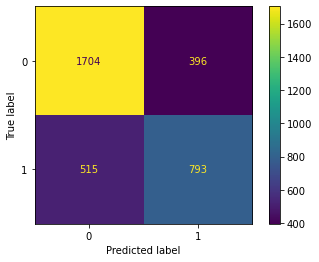

Train score: 0.73268779342723
Test data score: 0.7446954140999316


In [79]:

clf = create_model(X_train[cols],y_train,max_iter=150)

y_pred = clf.predict(X_train[cols])

ConfusionMatrixDisplay.from_predictions(y_train, y_pred) 

plt.show()
print('Train score:',clf.score(X_train[cols],y_train))
print('Test data score:',clf.score(X_test[cols],y_test))

#### Model 2


In [80]:
all_cols = set(X_train.columns)

cols_to_remove = {'Country',
                    'City',
                    'State',
                    'CustomerID',
                    'Zip Code',
                    'Lat Long',
                    'Total Charges',
                    'Internet Service_Fiber optic',
                    'Internet Service_No',
                    'Multiple Lines_No phone service',
                    'Latitude',
                    'Longitude',
                    'Churn Reason'
                    }
cols_new = list(all_cols-cols_to_remove)

cols_new



['Device Protection_Yes',
 'Tech Support_Yes',
 'Streaming TV_Yes',
 'Streaming TV_No internet service',
 'Online Backup_No internet service',
 'Payment Method_Credit card (automatic)',
 'Dependents_Yes',
 'Tech Support_No internet service',
 'Online Backup_Yes',
 'Online Security_No internet service',
 'Payment Method_Mailed check',
 'Contract_Two year',
 'Device Protection_No internet service',
 'Senior Citizen_Yes',
 'Multiple Lines_Yes',
 'Payment Method_Electronic check',
 'Contract_One year',
 'Gender_Male',
 'Streaming Movies_No internet service',
 'Partner_Yes',
 'Streaming Movies_Yes',
 'Phone Service_Yes',
 'Paperless Billing_Yes',
 'Online Security_Yes',
 'Tenure Months',
 'Monthly Charges']

In [81]:
def plot_correlation(corr):



    plt.figure(figsize = (15,12)) # setting the size of the output

    sns.heatmap(corr,
                annot = True,
                linecolor='black',
                center=0,
                vmin=-1,
                vmax=1,
                cmap = sns.diverging_palette(600,600, as_cmap=True),
                fmt='.4g')

    plt.title('Car features and thier correlation') # naming the plot

    #plt.savefig('plot.png', dpi = 300, bbox_inches = 'tight') # saving the chart as a .png – it will be saved in the current working directory

    plt.show()

churn_corr=X_train[cols_new].corr()

# plot_correlation(churn_corr)

Train Data Evaluation

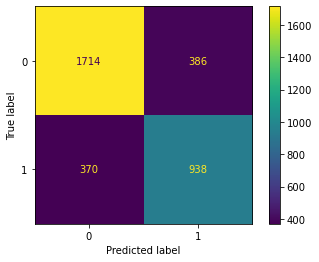

Train score: 0.778169014084507


In [82]:
clf = create_model(X_train[cols_new],y_train,max_iter=650)



y_pred = clf.predict(X_train[cols_new])

X_train['churn_pred'] = y_pred

ConfusionMatrixDisplay.from_predictions(y_train, y_pred) 

plt.show()
print('Train score:',clf.score(X_train[cols_new],y_train))



Test Data Evaluation

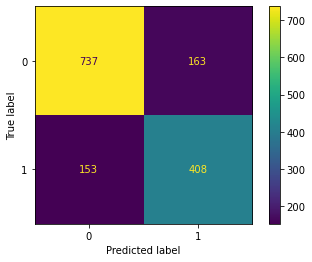

Test data score: 0.783709787816564


In [83]:
y_pred = clf.predict(X_test[cols_new])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred) 

plt.show()
print('Test data score:',clf.score(X_test[cols_new],y_test))

# Find 500 most customers most likely to churn

In [84]:
test_prob = clf.predict_proba(X_unchurned[cols_new]).T[0]
len(test_prob)

3000

### 500 customers more likey to churn

In [85]:
X_unchurned['churn_probability'] = clf.predict_proba(X_unchurned[cols_new]).T[0]
customers = X_unchurned.sort_values(by='churn_probability', axis=0, ascending=False)
customers_500 = list(customers['CustomerID'].head(500))
customers_500

['2804-ETQDK',
 '4957-SREEC',
 '6928-ONTRW',
 '5799-JRCZO',
 '3173-WSSUE',
 '7876-DNYAP',
 '9800-OUIGR',
 '0794-YVSGE',
 '0847-HGRML',
 '5893-KCLGT',
 '1166-PQLGG',
 '7010-BRBUU',
 '0562-HKHML',
 '3642-BYHDO',
 '0264-CNITK',
 '7064-JHXCE',
 '2607-DHDAK',
 '2236-HILPA',
 '3563-SVYLG',
 '0480-KYJVA',
 '0042-RLHYP',
 '8917-SZTTJ',
 '9625-RZFUK',
 '7673-BQGKU',
 '6980-IMXXE',
 '9838-BFCQT',
 '4821-WQOYN',
 '6585-WCEWR',
 '1830-IPXVJ',
 '6855-VLGOS',
 '7684-XSZIY',
 '5854-KSRBJ',
 '4193-IBKSW',
 '7980-MHFLQ',
 '7717-BICXI',
 '8514-VZHEB',
 '0485-ZBSLN',
 '8711-LOBKY',
 '7268-WNTCP',
 '8957-THMOA',
 '3777-XROBG',
 '2718-YSKCS',
 '9337-SRRNI',
 '8780-IHCRN',
 '0613-WUXUM',
 '6976-BWGLQ',
 '0040-HALCW',
 '7711-GQBZC',
 '8727-JQFHV',
 '7558-IMLMT',
 '3261-CQXOL',
 '9574-BOSMD',
 '1299-AURJA',
 '9430-NKQLY',
 '6857-TKDJV',
 '2050-ONYDQ',
 '6485-QXWWE',
 '0463-TXOAK',
 '6283-GITPX',
 '8946-BFWSG',
 '3498-LZGQZ',
 '8129-GMVGI',
 '7169-YWAMK',
 '2075-PUEPR',
 '9786-YWNHU',
 '7399-QHBJS',
 '2007-QVG

## Churn Factors

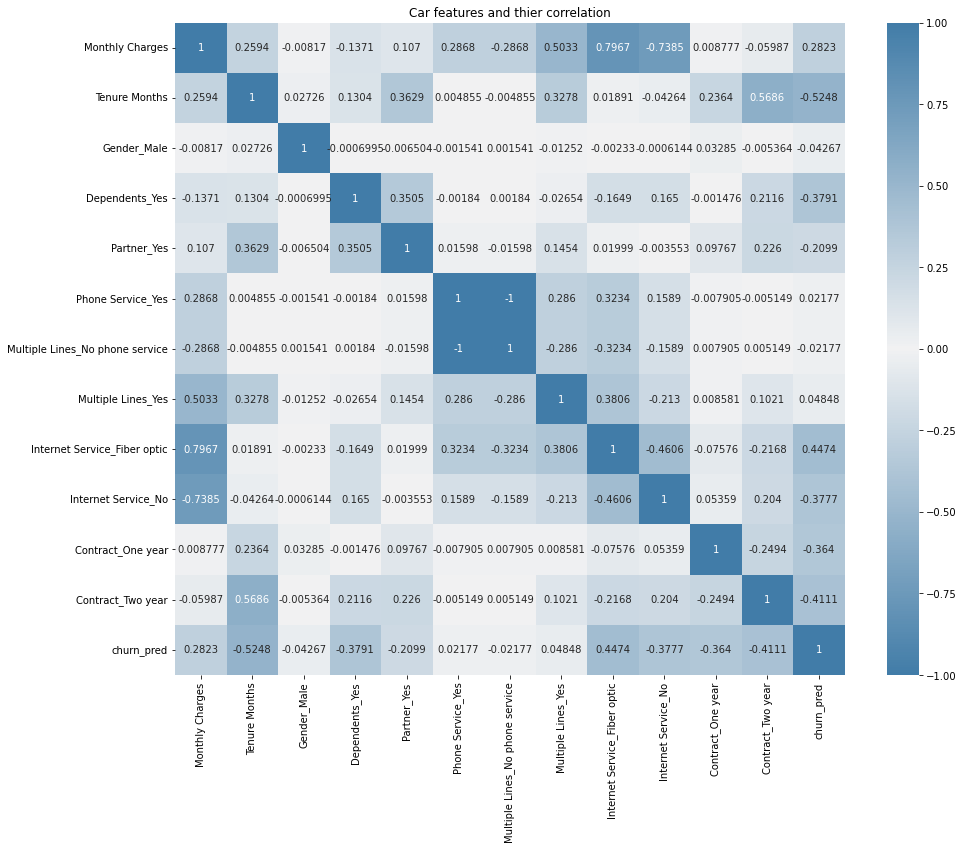

In [86]:
churn_factors = ['Monthly Charges',
                'Tenure Months',
                'Gender_Male',
                'Dependents_Yes',
                'Partner_Yes',
                'Phone Service_Yes', 
                'Multiple Lines_No phone service',
                'Multiple Lines_Yes',
                 'Internet Service_Fiber optic',
                'Internet Service_No',
                 'Contract_One year',
                  'Contract_Two year',
                'churn_pred',
                    ]

churn_corr=X_train[churn_factors].corr()
churn_corr
plot_correlation(churn_corr)

# Random Forest Modelling

In [87]:
y_test.unique()

array([1, 0], dtype=int64)

In [88]:
rf_cust=['6651-RLGGM','8946-BFWSG','1403-GYAFU',
 '0040-HALCW',
 '9800-OUIGR',
 '8219-VYBVI',
 '7010-BRBUU',
 '6976-BWGLQ',
 '0640-YJTPY',
 '3190-ITQXP',
 '3457-PQBYH',
 '6340-DACFT',
 '4804-NCPET',
 '4979-HPRFL',
 '7634-HLQJR',
 '6762-NSODU',
 '4779-ZGICK',
 '1052-QJIBV',
 '0962-CQPWQ',
 '0902-XKXPN',
 '1830-IPXVJ',
 '1098-KFQEC',
 '1248-DYXUB',
 '5549-ZGHFB',
 '5968-HYJRZ',
 '0402-OAMEN',
 '3088-FVYWK',
 '9365-CSLBQ',
 '6770-UAYGJ',
 '1834-WULEG',
 '8755-OGKNA',
 '3642-BYHDO',
 '6408-WHTEF',
 '0704-VCUMB',
 '9371-BITHB',
 '9950-MTGYX',
 '0301-FIDRB',
 '3913-RDSJZ',
 '2007-QVGAW',
 '9537-JALFH',
 '4443-EMBNA',
 '9415-ZNBSX',
 '3913-FCUUW',
 '5117-ZSMHQ',
 '1293-BSEUN',
 '4674-HGNUA',
 '0784-ZQJZX',
 '5480-XTFFL',
 '1764-VUUMT',
 '8540-ZQGEA',
 '0971-QIFJK',
 '4955-VCWBI',
 '8043-PNYSD',
 '0831-JNISG',
 '7647-GYYKX',
 '4487-ZYJZK',
 '3262-EIDHV',
 '0825-CPPQH',
 '4707-YNOQA',
 '5296-PSYVW',
 '4900-MSOMT',
 '1207-BLKSA',
 '0206-OYVOC',
 '3768-VHXQO',
 '7980-MHFLQ',
 '4962-CHQPW',
 '9067-SQTNS',
 '8194-PEEBY',
 '1089-XZWHH',
 '8434-VGEQQ',
 '9028-LIHRP',
 '7463-IFMQU',
 '9430-NKQLY',
 '3133-PZNSR',
 '1862-QRWPE',
 '2263-SFSQZ',
 '0404-AHASP',
 '2848-YXSMW',
 '9224-VTYID',
 '8779-YIQQA',
 '5627-TVBPP',
 '6892-BOGQE',
 '9710-NJERN',
 '5176-LMJXE',
 '1087-GRUYI',
 '2984-TBYKU',
 '7113-HIPFI',
 '8915-NNTRC',
 '5743-KHMNA',
 '4644-OBGFZ',
 '3129-AAQOU',
 '3470-OBUET',
 '1776-SPBWV',
 '9087-EYCPR',
 '9227-YBAXE',
 '6199-IPCAO',
 '2885-HIJDH',
 '1767-CJKBA',
 '2097-YVPKN',
 '8701-DGLVH',
 '8882-TLVRW',
 '2696-RZVZW',
 '3873-WOSBC',
 '8450-LUGUK',
 '0675-NCDYU',
 '8232-UTFOZ',
 '8645-KOMJQ',
 '5647-URDKA',
 '5982-XMDEX',
 '3148-AOIQT',
 '3258-ZKPAI',
 '6134-KWTBV',
 '5751-USDBL',
 '2908-WGAXL',
 '5177-RVZNU',
 '4973-MGTON',
 '8807-OPMBM',
 '6625-FLENO',
 '5442-PPTJY',
 '4163-NCJAK',
 '8512-WIWYV',
 '6164-HAQTX',
 '8966-SNIZF',
 '7643-RCHXS',
 '0531-XBKMM',
 '2256-YLYLP',
 '3889-VWBID',
 '1934-MKPXS',
 '7305-ZWMAJ',
 '1395-WSWXR',
 '5148-HKFIR',
 '6139-ZZRBQ',
 '4933-BSAIP',
 '1775-KWJKQ',
 '5067-WJEUN',
 '6265-FRMTQ',
 '3982-JGSFD',
 '2068-WWXQZ',
 '6867-ACCZI',
 '5248-YGIJN',
 '4565-NLZBV',
 '6384-VMJHP',
 '7710-JSYOA',
 '0757-WCUUZ',
 '5201-CBWYG',
 '5707-ZMDJP',
 '9624-EGDEQ',
 '0608-JDVEC',
 '8670-MEFCP',
 '0827-ITJPH',
 '4795-UXVCJ',
 '1982-FEBTD',
 '9739-JLPQJ',
 '2749-CTKAJ',
 '2005-DWQZJ',
 '0020-INWCK',
 '5231-FIQPA',
 '5821-MMEIL',
 '8857-CUPFQ',
 '6345-FZOQH',
 '5380-XPJNZ',
 '9435-JMLSX',
 '2333-KWEWW',
 '3525-DVKFN',
 '1755-FZQEC',
 '7328-OWMOM',
 '1116-FRYVH',
 '5214-CHIWJ',
 '6100-FJZDG',
 '9548-LERKT',
 '0129-QMPDR',
 '6332-FBZRI',
 '1945-XISKS',
 '3704-IEAXF',
 '5788-YPOEG',
 '5980-BDHPY',
 '2560-WBWXF',
 '9108-EQPNQ',
 '2995-YWTCD',
 '1240-HCBOH',
 '5996-EBTKM',
 '1682-VCOIO',
 '6447-EGDIV',
 '0621-CXBKL',
 '7190-XHTWJ',
 '3486-NPGST',
 '7765-LWVVH',
 '9531-NSBMR',
 '8901-UPRHR',
 '5469-NUJUR',
 '8046-DNVTL',
 '3230-JCNZS',
 '1335-MXCSE',
 '2235-EZAIK',
 '4573-JKNAE',
 '3646-ITDGM',
 '0401-WDBXM',
 '9297-EONCV',
 '5847-MXBEO',
 '9479-HYNYL',
 '3392-EHMNK',
 '1599-MMYRQ',
 '3301-VKTGC',
 '8510-TMWYB',
 '1930-BZLHI',
 '2599-CIPQE',
 '7416-CKTEP',
 '1015-JPFYW',
 '7665-NKLAV',
 '8780-YRMTT',
 '6368-TZZDT',
 '3795-CAWEX',
 '4980-URKXC',
 '1222-KJNZD',
 '9764-REAFF',
 '0042-JVWOJ',
 '6609-MXJHJ',
 '6445-TNRXS',
 '1657-DYMBM',
 '2146-EGVDT',
 '8097-OMULG',
 '6418-PIQSP',
 '3938-YFPXD',
 '9499-XPZXM',
 '4537-CIBHB',
 '4194-FJARJ',
 '6614-YOLAC',
 '2587-YNLES',
 '2773-MADBQ',
 '5696-EXCYS',
 '9500-IWPXQ',
 '9500-WBGRP',
 '1686-STUHN',
 '3617-XLSGQ',
 '9814-AOUDH',
 '7319-ZNRTR',
 '8565-WUXZU',
 '5930-GBIWP',
 '5063-IUOKK',
 '2796-NNUFI',
 '6217-KDYWC',
 '5126-RCXYW',
 '6122-EFVKN',
 '2205-LPVGL',
 '5614-DNZCE',
 '9385-NXKDA',
 '5485-ITNPC',
 '0123-CRBRT',
 '1492-KGETH',
 '0277-ORXQS',
 '5055-BRMNE',
 '5862-BRIXZ',
 '0519-DRGTI',
 '6434-TTGJP',
 '1573-LGXBA',
 '0017-DINOC',
 '7137-NAXML',
 '8592-PLTMQ',
 '2904-GGUAZ',
 '5730-DBDSI',
 '5656-JAMLX',
 '1302-TPUBN',
 '7636-PEPNS',
 '9769-TSBZE',
 '9397-TZSHA',
 '0960-HUWBM',
 '1439-LCGVL',
 '3967-KXAPS',
 '3200-MNQTF',
 '3948-KXDUF',
 '2990-IAJSV',
 '1414-YADCW',
 '8106-GWQOK',
 '7607-QKKTJ',
 '7696-AMHOD',
 '3552-CTCYF',
 '3766-EJLFL',
 '5816-JMLGY',
 '8457-XIGKN',
 '7432-FFVAR',
 '4654-ULTTN',
 '3021-VLNRJ',
 '7605-BDWDC',
 '4178-EGMON',
 '4737-HOBAX',
 '9639-BUJXT',
 '6625-IUTTT',
 '3026-ATZYV',
 '0559-CKHUS',
 '2790-XUYMV',
 '1139-WUOAH',
 '3423-HHXAO',
 '5232-NXPAY',
 '0114-IGABW',
 '7109-CQYUZ',
 '0379-DJQHR',
 '9746-MDMBK',
 '8958-JPTRR',
 '6616-AALSR',
 '4671-VJLCL',
 '9560-BBZXK',
 '9938-TKDGL',
 '0221-NAUXK',
 '6103-LIANB',
 '8859-AXJZP',
 '8390-FESFV',
 '6650-BWFRT',
 '4950-HKQTE',
 '3719-TDVQB',
 '6556-DBKZF',
 '8328-SKJNO',
 '7233-PAHHL',
 '8690-UPCZI',
 '4295-YURET',
 '1133-KXCGE',
 '1345-ZUKID',
 '8809-XKHMD',
 '4102-HLENU',
 '4933-IKULF',
 '1051-EQPZR',
 '9451-WLYRI',
 '8871-JLMHM',
 '9150-KPBJQ',
 '5197-PYEPU',
 '3721-CNZHX',
 '5260-UMPWX',
 '4994-OBRSZ',
 '9313-QOLTZ',
 '6050-IJRHS',
 '0014-BMAQU',
 '2788-CJQAQ',
 '0513-RBGPE',
 '5062-CJJKH',
 '2192-OZITF',
 '8433-WPJTV',
 '9978-HYCIN',
 '1297-VQDRP',
 '9715-SBVSU',
 '2990-OGYTD',
 '5356-KZCKT',
 '4359-INNWN',
 '0945-TSONX',
 '0602-DDUML',
 '5310-NOOVA',
 '7407-SUJIZ',
 '4849-PYRLQ',
 '8241-JUIQO',
 '0731-EBJQB',
 '0916-KNFAJ',
 '4531-AUZNK',
 '2521-NPUZR',
 '5762-TJXGK',
 '0383-CLDDA',
 '7047-YXDMZ',
 '0253-ZTEOB',
 '1470-PSXNM',
 '5642-MHDQT',
 '9675-ICXCT',
 '6904-JLBGY',
 '9766-HGEDE',
 '3530-VWVGU',
 '2400-XIWIO',
 '3669-WHAFY',
 '5446-DKWYW',
 '8076-FEZKJ',
 '8573-JGCZW',
 '6248-TKCQV',
 '4355-CVPVS',
 '2171-UDMFD',
 '5150-LJNSR',
 '4376-KFVRS',
 '2040-LDIWQ',
 '6421-SZVEM',
 '4648-YPBTM',
 '7623-HKYRK',
 '2243-FNMMI',
 '9677-AVKED',
 '9419-IPPBE',
 '4851-BQDNX',
 '0230-UBYPQ',
 '7138-GIRSH',
 '3258-SYSWS',
 '6339-TBELP',
 '1480-BKXGA',
 '7609-YBPXG',
 '6463-MVYRY',
 '1061-PNTHC',
 '6152-ONASV',
 '9844-FELAJ',
 '5837-LXSDN',
 '7136-IHZJA',
 '2724-FJDYW',
 '7520-HQWJU',
 '7163-OCEQI',
 '2926-JEJJC',
 '5914-XRFQB',
 '8461-EFQYM',
 '7691-KGKGP',
 '0788-DXBFY',
 '9467-ROOLM',
 '5995-LFTLE',
 '5183-KLYEM',
 '2088-IEBAU',
 '0979-MOZQI',
 '2696-ECXKC',
 '5125-CNDSP',
 '2302-OUZXB',
 '0254-FNMCI',
 '6114-TCFID',
 '2233-TXSIU',
 '9867-NNXLC',
 '9968-FFVVH',
 '2096-XOTMO',
 '4713-ZBURT',
 '8263-QMNTJ',
 '0536-BGFMZ',
 '6388-TABGU',
 '9070-BCKQP',
 '1684-FLBGS',
 '1525-LNLOJ',
 '4213-HKBJO',
 '2739-CCZMB',
 '5619-XZZKR',
 '4694-PHWFW',
 '4670-TABXH',
 '0516-QREYC',
 '1163-ONYEY',
 '2933-XEUJM',
 '9432-RUVSL',
 '8439-LTUGF',
 '2958-NHPPS',
 '7449-HVPIV',
 '0285-INHLN',
 '7639-LIAYI',
 '9127-QRZMH',
 '2578-JQPHZ',
 '6668-CNMFP',
 '1271-UODNO',
 '7954-MLBUN',
 '4712-UYOOI',
 '5693-PIPCS',
 '0305-SQECB',
 '3128-YOVTD',
 '8033-ATFAS',
 '9803-FTJCG',
 '0455-ENTCR',
 '8570-KLJYJ',
 '9351-HXDMR',
 '0907-HQNTS',
 '3012-VFFMN',
 '4472-VESGY',
 '6543-JXSOO',
 '1735-XMJVH',
 '6974-DAFLI',
 '4657-FWVFY',
 '5393-HJZSM',
 '6682-VCIXC',
 '5846-QFDFI',
 '6308-CQRBU',
 '9495-SKLKD',
 '5855-EIBDE',
 '0813-TAXXS',
 '8042-RNLKO',
 '2039-JONDJ',
 '3061-BCKYI',
 '8942-DBMHZ',
 '5274-XHAKY',
 '0292-WEGCH',
 '9796-MVYXX',
 '4686-GEFRM',
 '2959-EEXWB',
 '5414-OFQCB',
 '3161-GETRM',
 '6048-UWKAL',
 '6257-DTAYD',
 '3518-FSTWG',
 '7148-XZPHA',
 '9362-MWODR',
 '5712-VBOXD',
 '8329-GWVPJ',
 '3541-ZNUHK',
 '1755-RMCXH',
 '9586-JGQKH',
 '1785-BPHTP',
 '7976-CICYS',
 '7426-WEIJX',
 '3716-LRGXK',
 '8404-VLQFB',
 '0913-XWSCN',
 '5977-CKHON',
 '5294-DMSFH',
 '4854-SSLTN',
 '6353-BRMMA',
 '8348-JLBUG',
 '0620-XEFWH',
 '8378-LKJAF',
 '5954-BDFSG',
 '9670-BPNXF',
 '6121-TNHBO',
 '0128-MKWSG']

In [89]:
lr_cust = ['0784-ZQJZX',
 '3279-DYZQM',
 '0831-JNISG',
 '6928-ONTRW',
 '1166-PQLGG',
 '3173-WSSUE',
 '1052-QJIBV',
 '4086-WITJG',
 '0464-WJTKO',
 '4277-BWBML',
 '0794-YVSGE',
 '2804-ETQDK',
 '4817-KEQSP',
 '3642-BYHDO',
 '0264-CNITK',
 '0640-YJTPY',
 '1403-GYAFU',
 '8229-BUJHX',
 '3996-ZNWYK',
 '4957-SREEC',
 '1764-VUUMT',
 '0042-RLHYP',
 '9537-JALFH',
 '6980-IMXXE',
 '3563-SVYLG',
 '0902-XKXPN',
 '9365-CSLBQ',
 '3678-MNGZX',
 '7157-SMCFK',
 '9800-OUIGR',
 '8043-PNYSD',
 '7980-MHFLQ',
 '7113-HIPFI',
 '1293-BSEUN',
 '0480-KYJVA',
 '7010-BRBUU',
 '6963-KQYQB',
 '0613-WUXUM',
 '8165-ZJRNM',
 '1555-HAPSU',
 '6181-AXXYF',
 '2607-DHDAK',
 '4821-WQOYN',
 '0402-OAMEN',
 '7684-XSZIY',
 '3810-PJUHR',
 '5854-KSRBJ',
 '4193-IBKSW',
 '5884-FBCTL',
 '6976-BWGLQ',
 '6585-WCEWR',
 '1830-IPXVJ',
 '2236-HILPA',
 '0174-QRVVY',
 '7711-GQBZC',
 '2718-YSKCS',
 '0962-CQPWQ',
 '8711-LOBKY',
 '7268-WNTCP',
 '0394-YONDK',
 '3261-CQXOL',
 '8917-SZTTJ',
 '8164-OCKUJ',
 '1299-AURJA',
 '6253-GNHWH',
 '4195-PNGZS',
 '3777-XROBG',
 '7729-XBTWX',
 '7558-IMLMT',
 '2007-QVGAW',
 '6651-RLGGM',
 '3457-PQBYH',
 '7169-YWAMK',
 '9574-BOSMD',
 '6857-TKDJV',
 '8755-OGKNA',
 '0485-ZBSLN',
 '1098-KFQEC',
 '6734-JDTTV',
 '8946-BFWSG',
 '2075-PUEPR',
 '9565-AXSMR',
 '9371-BITHB',
 '9173-IVZVP',
 '8780-IHCRN',
 '7643-RCHXS',
 '0040-HALCW',
 '8882-TLVRW',
 '9430-NKQLY',
 '7860-UXCRM',
 '0531-XBKMM',
 '7293-LSCDV',
 '6582-PLFUU',
 '4625-XMOYM',
 '9257-AZMTZ',
 '0988-AADSA',
 '4900-MSOMT',
 '3359-DSRKA',
 '2230-XTUWL',
 '0562-FGDCR',
 '3511-BFTJW',
 '6340-DACFT',
 '3913-FCUUW',
 '2314-TNDJQ',
 '7608-RGIRO',
 '4534-WGCIR',
 '0386-CWRGM',
 '1814-WFGVS',
 '8395-ETZKQ',
 '7634-HLQJR',
 '4742-TXUEX',
 '6762-NSODU',
 '9769-TSBZE',
 '7242-EDTYC',
 '0508-SQWPL',
 '4979-HPRFL',
 '1207-BLKSA',
 '9975-GPKZU',
 '5970-GHJAW',
 '6518-PPLMZ',
 '6897-RWMUB',
 '0463-TXOAK',
 '2799-TSLAG',
 '3190-ITQXP',
 '1248-DYXUB',
 '8922-NPKBJ',
 '0238-WHBIQ',
 '3470-OBUET',
 '5196-WPYOW',
 '8215-NGSPE',
 '7647-GYYKX',
 '1468-DEFNC',
 '3088-FVYWK',
 '4674-HGNUA',
 '4636-TVXVG',
 '5067-WJEUN',
 '5549-ZGHFB',
 '8626-XHBIE',
 '5117-ZSMHQ',
 '1106-HRLKZ',
 '8690-ZVLCL',
 '5115-GZDEL',
 '4779-ZGICK',
 '3889-VWBID',
 '3262-EIDHV',
 '6770-UAYGJ',
 '4302-ZYFEL',
 '0244-LGNFY',
 '9823-EALYC',
 '5795-BKOYE',
 '2378-YIZKA',
 '5968-HYJRZ',
 '7009-PCARS',
 '1027-LKKQQ',
 '9593-CVZKR',
 '0206-OYVOC',
 '0769-MURVM',
 '6439-PKTRR',
 '4915-BFSXL',
 '4644-OBGFZ',
 '8597-CTXVJ',
 '5296-BFCYD',
 '0506-YLVKJ',
 '6096-EGVTU',
 '2908-WGAXL',
 '7601-GNDYK',
 '6408-WHTEF',
 '5845-BZZIB',
 '7321-KKSDU',
 '5939-SXWHM',
 '7696-CFTAT',
 '5320-BRKGK',
 '8807-OPMBM',
 '9028-LIHRP',
 '2888-ADFAO',
 '2560-QTSBS',
 '3120-FAZKD',
 '2642-MAWLJ',
 '2885-HIJDH',
 '7018-FPXHH',
 '8249-THVEC',
 '4194-FJARJ',
 '8219-VYBVI',
 '3227-WLKLI',
 '2821-WARNZ',
 '5135-RDDQL',
 '3950-VPYJB',
 '7872-BAAZR',
 '2263-SFSQZ',
 '2580-ATZSQ',
 '5201-CBWYG',
 '1599-EAHXY',
 '6656-GULJQ',
 '5338-YHWYT',
 '4641-FROLU',
 '9415-ZNBSX',
 '1492-KGETH',
 '4827-DPADN',
 '6122-LJADA',
 '1270-XKUCC',
 '1335-MXCSE',
 '5248-RPYWW',
 '5480-XTFFL',
 '1116-FRYVH',
 '0301-FIDRB',
 '9443-JUBUO',
 '5707-ZMDJP',
 '0625-AFOHS',
 '9348-ROUAI',
 '9418-RUKPH',
 '3704-IEAXF',
 '3472-QPRCH',
 '8577-QSOCG',
 '8902-ZEOVF',
 '2256-YLYLP',
 '5360-XGYAZ',
 '7340-KEFQE',
 '4609-KNNWG',
 '1839-FBNFR',
 '9055-MOJJJ',
 '4632-XJMEX',
 '2599-CIPQE',
 '1930-QPBVZ',
 '2160-GPFXD',
 '3727-OVPRY',
 '6332-FBZRI',
 '9385-EHGDO',
 '2725-IWWBA',
 '7267-FRMJW',
 '2661-GKBTK',
 '7602-DBTOU',
 '8966-KZXXA',
 '5996-EBTKM',
 '4955-VCWBI',
 '0567-XRHCU',
 '8173-RXAYP',
 '2193-SFWQW',
 '5787-KXGIY',
 '2848-YXSMW',
 '8232-UTFOZ',
 '0404-AHASP',
 '8645-KOMJQ',
 '0825-CPPQH',
 '9227-YBAXE',
 '1927-QEWMY',
 '5751-USDBL',
 '4518-FZBSX',
 '7463-IFMQU',
 '5453-YBTWV',
 '4896-CPRPF',
 '6345-FZOQH',
 '9067-SQTNS',
 '5848-FHRFC',
 '1635-HDGFT',
 '2545-LXYVJ',
 '5774-QPLTF',
 '5249-QYHEX',
 '8966-SNIZF',
 '8619-IJNDK',
 '0505-SPOOW',
 '2616-FLVQC',
 '5146-YYFRZ',
 '5322-ZSMZY',
 '1945-XISKS',
 '1302-TPUBN',
 '0298-XACET',
 '7216-KAOID',
 '4295-YURET',
 '5730-DBDSI',
 '2984-RGEYA',
 '1223-UNPKS',
 '4056-QHXHZ',
 '0739-UUAJR',
 '8999-EXMNO',
 '5177-RVZNU',
 '4804-NCPET',
 '6519-ZHPXP',
 '6199-IPCAO',
 '1172-VIYBP',
 '7973-DZRKH',
 '4487-ZYJZK',
 '8544-JNBOX',
 '5126-RCXYW',
 '7606-BPHHN',
 '5397-NSKQG',
 '2040-XBAVJ',
 '8207-DMRVL',
 '2984-TBYKU',
 '9945-PSVIP',
 '1177-XZBJL',
 '0654-PQKDW',
 '8857-CUPFQ',
 '9500-WBGRP',
 '0277-ORXQS',
 '8092-NLTGF',
 '9950-MTGYX',
 '8450-LUGUK',
 '5322-TEUJK',
 '7161-DFHUF',
 '5656-JAMLX',
 '7665-NKLAV',
 '0057-QBUQH',
 '9739-JLPQJ',
 '5788-YPOEG',
 '6484-LATFU',
 '6696-YDAYZ',
 '8774-GSBUN',
 '4312-KFRXN',
 '7473-ZBDSN',
 '3133-PZNSR',
 '8097-OMULG',
 '1552-CZCLL',
 '3896-ZVNET',
 '1089-XZWHH',
 '2664-XJZNO',
 '9397-TZSHA',
 '5743-KHMNA',
 '3389-KTRXV',
 '0757-WCUUZ',
 '1403-LKLIK',
 '4836-WNFNO',
 '8749-TZYEC',
 '7114-AEOZE',
 '8510-TMWYB',
 '4962-CHQPW',
 '1757-TCATG',
 '4293-ETKAP',
 '9084-OAYKL',
 '2808-CHTDM',
 '2137-DQMEV',
 '0854-UYHZD',
 '2550-AEVRU',
 '1960-UOTYM',
 '7471-MQPOS',
 '2509-TFPJU',
 '0071-NDAFP',
 '4573-JKNAE',
 '1767-CJKBA',
 '4443-EMBNA',
 '8735-SDUFN',
 '0704-VCUMB',
 '9359-JANWS',
 '1843-TLSGD',
 '6556-DBKZF',
 '5442-PPTJY',
 '6772-WFQRD',
 '3696-DFHHB',
 '8659-IOOPU',
 '8434-VGEQQ',
 '1131-QQZEB',
 '6892-BOGQE',
 '2097-YVPKN',
 '9764-REAFF',
 '7493-GVFIO',
 '6609-MXJHJ',
 '2146-EGVDT',
 '7452-FOLON',
 '1635-NZATJ',
 '5208-FVQKB',
 '0971-QIFJK',
 '0621-CXBKL',
 '5583-EJXRD',
 '6901-GOGZG',
 '3836-FZSDJ',
 '3520-FJGCV',
 '1063-DHQJF',
 '2228-BZDEE',
 '6625-FLENO',
 '3646-ITDGM',
 '1032-MAELW',
 '6522-OIQSX',
 '3392-EHMNK',
 '2696-RZVZW',
 '1494-EJZDW',
 '5849-ASHZJ',
 '9802-CAQUT',
 '9953-ZMKSM',
 '3118-UHVVQ',
 '3352-RICWQ',
 '2632-IVXVF',
 '3948-KXDUF',
 '6384-VMJHP',
 '3768-VHXQO',
 '0064-SUDOG',
 '3129-AAQOU',
 '0266-GMEAO',
 '3021-VLNRJ',
 '2005-DWQZJ',
 '9993-LHIEB',
 '9224-VTYID',
 '5627-TVBPP',
 '3870-SPZSI',
 '3873-WOSBC',
 '9814-AOUDH',
 '5647-URDKA',
 '2516-XSJKX',
 '5982-XMDEX',
 '6134-KWTBV',
 '9801-NOSHQ',
 '3230-JCNZS',
 '5821-MMEIL',
 '0224-NIJLP',
 '3717-FDJFU',
 '5472-CVMDX',
 '3913-RDSJZ',
 '9777-IQHWP',
 '9499-XPZXM',
 '8314-HTWVE',
 '0675-NCDYU',
 '9087-EYCPR',
 '2675-IJRGJ',
 '8701-DGLVH',
 '5766-FTRTS',
 '9625-QNLUX',
 '0017-IUDMW',
 '6139-ZZRBQ',
 '8915-NNTRC',
 '3812-LRZIR',
 '8480-PPONV',
 '5334-AFQJB',
 '3027-YNWZU',
 '1051-EQPZR',
 '4636-OLWOE',
 '8606-CIQUL',
 '2587-YNLES',
 '8039-ACLPL',
 '7337-CINUD',
 '6061-GWWAV',
 '3258-ZKPAI',
 '3200-MNQTF',
 '3882-IYOIJ',
 '2176-OSJUV',
 '8194-PEEBY',
 '8540-ZQGEA',
 '2606-PKWJB',
 '6917-FIJHC',
 '2817-LVCPP',
 '2223-GDSHL',
 '8466-PZBLH',
 '7636-PEPNS',
 '5095-ETBRJ',
 '1834-WULEG',
 '8883-ANODQ',
 '3810-DVDQQ',
 '6734-PSBAW',
 '5375-XLDOF',
 '5965-GGPRW',
 '2138-VFAPZ',
 '3795-CAWEX',
 '3212-KXOCR',
 '2878-DHMIN',
 '2632-TACXW',
 '0885-HMGPY',
 '1657-DYMBM',
 '5296-PSYVW',
 '5055-BRMNE',
 '7998-WNZEM',
 '9964-WBQDJ',
 '6217-KDYWC',
 '3612-YVGSJ',
 '4807-IZYOZ',
 '8361-LBRDI',
 '0281-CNTZX',
 '2235-EZAIK',
 '7569-NMZYQ',
 '1407-DIGZV',
 '4378-MYPGO',
 '9091-WTUUY',
 '1080-BWSYE',
 '2560-WBWXF',
 '6445-TNRXS',
 '1240-HCBOH',
 '5915-ANOEI',
 '0804-YGEQV',
 '7860-KSUGX',
 '5529-GIBVH',
 '4632-PAOYU',
 '1776-SPBWV',
 '9178-JHUVJ',
 '4530-NDRKU',
 '4994-OBRSZ',
 '4565-NLZBV',
 '8587-XYZSF',
 '3617-XLSGQ',
 '1955-IBMMB',
 '2405-LBMUW',
 '7710-JSYOA',
 '2650-GYRYL',
 '6368-TZZDT',
 '1741-WTPON',
 '2452-MRMZF',
 '1354-YZFNB',
 '9867-XOBQA',
 '9640-ZSLDC',
 '8779-YIQQA',
 '1431-AIDJQ',
 '8259-DZLIZ',
 '7898-PDWQE',
 '6695-FRVEC',
 '9500-IWPXQ']

In [90]:
lr_cust = set(lr_cust)
rf_cust=set(rf_cust)

len(lr_cust.intersection(rf_cust))

181